In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing API to connect to NFL data sources like nflfastR, nfldata, dynastyprocess, and Draft Scout.
import nfl_data_py as nfl 

In [3]:
# bringing back in data frames ff_all and ff_collective

ff_all = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv", index_col = 0,
                    low_memory = False)
ff_collective = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv", index_col = 0)

In [5]:
# making all cols lower case

ff_all.columns = map(str.lower, ff_all.columns)
ff_collective.columns = map(str.lower, ff_collective.columns)


# FF Collective initial EDA, further cleaning, feature engineering

In [38]:
# take a look at sample of the data, make sure everything looks 

pd.set_option('display.max_columns', None)
ff_collective.sample(12)

team          player_name position player_id_x  height  weight  \
259   DEN      Devontae Booker       RB  00-0032972    71.0   219.0   
3162   LV    Cole Fotheringham       TE  00-0037506    76.0   243.0   
539   LAC      Justice Liggins       WR  00-0034038     NaN   209.0   
113   CAR           Will Grier       QB  00-0035251    73.0   220.0   
2649  WAS      Jaret Patterson       RB  00-0036755    69.0   195.0   
1086  BUF      Isaiah McKenzie       WR  00-0033466    68.0   173.0   
16    ARI          Kevin White       WR  00-0031545     NaN   216.0   
527   LAC     Stephen Anderson       TE  00-0032725    75.0   230.0   
2328   LV          Alec Ingold       RB  00-0035125    73.0   242.0   
249   DAL       Michael Gallup       WR  00-0034764    73.0   200.0   
692    NO  Lil'Jordan Humphrey       WR  00-0035406    76.0   225.0   
1988  CHI            Ben Mason       TE  00-0036565    75.0   254.0   

      years_exp   tm  pos   age     g    gs    tgt   rec  passingyds  \
259         3.0  DEN   RB  27.0  16.0   0.0    9.0   6.0         0.0   
3162        0.0  NaN  NaN   NaN   NaN   NaN    NaN   NaN         NaN   
539         NaN  NaN  NaN   NaN   NaN   NaN    NaN   NaN         NaN   
113         0.0  CAR   QB  24.0   2.0   2.0    0.0   0.0       228.0   
2649        0.0  WAS   RB  22.0  17.0   1.0   11.0  10.0         0.0   
1086        3.0  BUF   WR  25.0  16.0   7.0   34.0  30.0        12.0   
16          NaN  NaN  NaN   NaN   NaN   NaN    NaN   NaN         NaN   
527         3.0  LAC    0  26.0   1.0   0.0    0.0   0.0         0.0   
2328        2.0  LVR   RB  25.0   9.0   3.0   12.0  10.0         0.0   
249         1.0  DAL   WR  23.0  14.0  12.0  113.0  66.0         0.0   
692         0.0  NOR    0  21.0   5.0   1.0    1.0   0.0         0.0   
1988        0.0  NaN  NaN   NaN   NaN   NaN    NaN   NaN         NaN   

      passingtd  passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
259         0.0         0.0         9.0        0.0         2.0          57.0   
3162        NaN         NaN         NaN        NaN         NaN           NaN   
539         NaN         NaN         NaN        NaN         NaN           NaN   
113         0.0        52.0        22.0        0.0         7.0           0.0   
2649        0.0         0.0       266.0        2.0        68.0          73.0   
1086        1.0         1.0         9.0        0.0        10.0         282.0   
16          NaN         NaN         NaN        NaN         NaN           NaN   
527         0.0         0.0         0.0        0.0         0.0           0.0   
2328        0.0         0.0         1.0        0.0         2.0          85.0   
249         0.0         0.0         0.0        0.0         0.0        1107.0   
692         0.0         0.0         0.0        0.0         0.0           0.0   
1988        NaN         NaN         NaN        NaN         NaN           NaN   

      receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
259           0.0          12.60  0.0      0.0          0.0    NaN   
3162          NaN            NaN  NaN      NaN          NaN    NaN   
539           NaN            NaN  NaN      NaN          NaN    NaN   
113           0.0           1.32  4.0      1.0          1.0    NaN   
2649          0.0          46.00  0.0      1.0          0.0    NaN   
1086          5.0          70.00  0.0      0.0          0.0    NaN   
16            NaN            NaN  NaN      NaN          NaN    NaN   
527           0.0           0.00  0.0      0.0          0.0    NaN   
2328          1.0          15.00  0.0      0.0          0.0    NaN   
249           6.0         212.70  0.0      0.0          0.0  120.0   
692           0.0           0.00  0.0      0.0          0.0    NaN   
1988          NaN            NaN  NaN      NaN          NaN    NaN   

                name  season  cmp  y/a  y/r  totaltds_22  2pm  2pp  ppr  dkpt  \
259              NaN    2019  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   
3162             NaN    2022  

In [35]:
ff_collective.describe()

height       weight    years_exp          age            g  \
count  3294.000000  3468.000000  3133.000000  2436.000000  2436.000000   
mean     73.425622   217.430219     3.211299    26.158867    10.767241   
std       2.881150    23.556890     3.165110     3.305494     5.323885   
min      66.000000   153.000000     0.000000    21.000000     0.000000   
25%      71.000000   200.000000     1.000000    24.000000     6.000000   
50%      74.000000   215.000000     2.000000    26.000000    12.000000   
75%      76.000000   235.000000     5.000000    28.000000    16.000000   
max      81.000000   311.000000    22.000000    45.000000    17.000000   

                gs          tgt          rec   passingyds    passingtd  \
count  2436.000000  2435.000000  2435.000000  2435.000000  2435.000000   
mean      5.024220    27.763860    18.651745   210.641068     1.325667   
std       5.567269    36.106362    24.422859   805.679578     5.429489   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     0.000000   
50%       2.000000    12.000000     8.000000     0.000000     0.000000   
75%       9.000000    43.000000    29.000000     0.000000     0.000000   
max      17.000000   191.000000   149.000000  5316.000000    48.000000   

        passingatt   rushingyds    rushingtd   rushingatt  receivingyds  \
count  2435.000000  2435.000000  2435.000000  2435.000000   2435.000000   
mean     29.450103    98.114579     0.785626    22.394661    206.659138   
std     110.529005   237.143759     2.109580    52.097208    299.121100   
min       0.000000   -15.000000     0.000000     0.000000    -10.000000   
25%       0.000000     0.000000     0.000000     0.000000      4.000000   
50%       0.000000     1.000000     0.000000     1.000000     70.000000   
75%       0.000000    53.000000     0.000000    12.000000    289.500000   
max     733.000000  2027.000000    18.000000   378.000000   1947.000000   

       receivingtd  fantasypoints          int      fumbles  fumbleslost  \
count  2435.000000    2243.000000  2435.000000  2435.000000  2435.000000   
mean      1.292813      64.570860     0.671458     0.936756     0.431622   
std       2.217268      77.138975     2.520513     1.975430     0.968138   
min       0.000000      -4.000000     0.000000     0.000000     0.000000   
25%       0.000000       8.000000     0.000000     0.000000     0.000000   
50%       0.000000      34.600000     0.000000     0.000000     0.000000   
75%       2.000000      94.000000     0.000000     1.000000     1.000000   
max      18.000000     469.200000    30.000000    18.000000    11.000000   

              adp       season         cmp         y/a         y/r  \
count  626.000000  3477.000000  602.000000  329.000000  458.000000   
mean    87.404153  2020.420765   19.084718    4.236657   10.315349   
std     55.546921     1.129862   70.662690    3.914599    5.394760   
min      1.000000  2019.000000    0.000000   -7.500000   -6.000000   
25%     41.000000  2019.000000    0.000000    2.250000    7.000000   
50%     82.000000  2020.000000    0.000000    4.040000    9.890000   
75%    127.750000  2021.000000    0.000000    5.120000   12.725000   
max    222.000000  2022.000000  490.000000   40.000000   42.000000   

       totaltds_22        2pm       2pp         ppr        dkpt        fdpt  \
count   602.000000  51.000000  24.00000  544.000000  543.000000  543.000000   
mean      1.983389   1.078431   1.62500   79.849081   83.657274   70.541252   
std       2.868683   0.271524   0.76967   86.167300   89.018201   79.482507   
min       0.000000   1.000000   1.00000   -2.900000   -1.000000   -2.000000   
25%       0.000000   1.000000   1.00000   11.700000   12.350000   10.400000   
50%       1.000000   1.000000   1.00000   45.800000   50.500000   40.100000   
75%       3.000000   1.000000   2.00000  118.300000  125.500000  105.400000   
max      18.000000   2.000000   3.00000  417.400000  4

We should create some type of cutoff for amount of games played, and keep track of what our limitations will be


Text(0.5, 1.0, 'Distribution of games started')

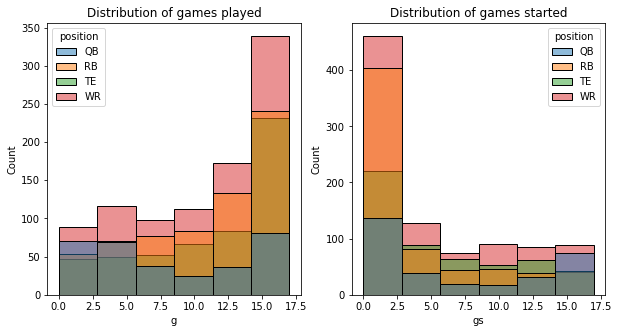

In [45]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')


In [37]:
ff_collective['position'].value_counts()

WR    1372
RB     871
TE     744
QB     482
Name: position, dtype: int64

In [51]:
ff_collective[['g', 'gs']].quantile([.1, .2, .25])

g   gs
0.10  2.0  0.0
0.20  5.0  0.0
0.25  6.0  0.0

It would makes sense to have a games played cutoff for all positons (20th percentile is 5 games played; is a good cut off to keep the top 80% of the league). many of the RBs, WRs and TEs play in a lot of games but don't start them -- the nature of the sport and the amount of players at each position.

Only for QBs should there be a cutoff for games started. 

Other ways to clean up data? 

In [39]:
### if players didn't record any FF stats, some of these columns would be null
# let's check

ff_collective[['tm', 'g', 'gs']].isna().sum()

tm    1041
g     1041
gs    1041
dtype: int64

In [87]:
# see a sample of data with nulls

ff_collective[ff_collective[['tm', 'g', 'gs']].isnull().any(axis = 1)].sample(10)

team            player_name position player_id_x  height  weight  \
1232  DEN            Austin Fort       TE  00-0034932    76.0   244.0   
1714  PHI  J.J. Arcega-Whiteside       WR  00-0035246    74.0   225.0   
175   CIN          Jordan Franks       RB  00-0034532    76.0   239.0   
1595   NO              Cole Wick       TE  00-0032562    78.0   255.0   
261   DEN      Khalfani Muhammad       RB  00-0033797    67.0   174.0   
1050  BAL         Jacob Breeland       TE  00-0036154    77.0   250.0   
624   MIN          Jordan Taylor       WR  00-0031697     NaN   195.0   
2561  PIT           Joshua Dobbs       QB  00-0033949    75.0   216.0   
1951  CAR         Phillip Walker       QB  00-0033275    71.0   212.0   
2848  CIN       Elijah Holyfield       RB  00-0035442    70.0   215.0   

      years_exp   tm  pos  age   g  gs  tgt  rec  passingyds  passingtd  \
1232        1.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
1714        1.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
175         1.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
1595        4.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
261         NaN  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
1050        0.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
624         NaN  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
2561        4.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
1951        4.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   
2848        3.0  NaN  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN   

      passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
1232         NaN         NaN        NaN         NaN           NaN   
1714         NaN         NaN        NaN         NaN           NaN   
175          NaN         NaN        NaN         NaN           NaN   
1595         NaN         NaN        NaN         NaN           NaN   
261          NaN         NaN        NaN         NaN           NaN   
1050         NaN         NaN        NaN         NaN           NaN   
624          NaN         NaN        NaN         NaN           NaN   
2561         NaN         NaN        NaN         NaN           NaN   
1951         NaN         NaN        NaN         NaN           NaN   
2848         NaN         NaN        NaN         NaN           NaN   

      receivingtd  fantasypoints  int  fumbles  fumbleslost  adp name  season  \
1232          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2020   
1714          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2020   
175           NaN            NaN  NaN      NaN          NaN  NaN  NaN    2019   
1595          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2020   
261           NaN            NaN  NaN      NaN          NaN  NaN  NaN    2019   
1050          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2020   
624           NaN            NaN  NaN      NaN          NaN  NaN  NaN    2019   
2561          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2021   
1951          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2021   
2848          NaN            NaN  NaN      NaN          NaN  NaN  NaN    2022   

      cmp  y/a  y/r  totaltds_22  2pm  2pp  ppr  dkpt  fdpt  vbd  posrank  \
1232  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
1714  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
175   NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
1595  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
261   NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
1050  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
624   NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
2561  NaN  NaN  NaN          NaN  NaN  NaN  NaN   NaN   NaN  NaN      NaN   
1951  NaN  NaN  NaN          N

We will get rid of nulls here, as well

In [64]:
## checking fantasy data

ff_collective[['player_name', 'fantasypoints', 'season']].sample(5)

player_name  fantasypoints  season
2251      Joe Fortson           17.0    2021
901       Matt Breida          103.3    2019
642   Benjamin Watson            NaN    2019
1710   Alshon Jeffery           18.0    2020
184       Drew Sample            8.0    2019

Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

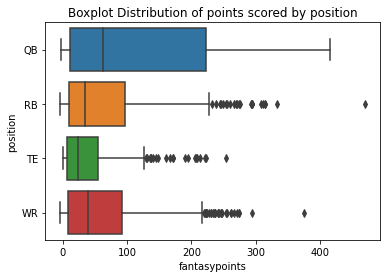

In [79]:
# let's visualize some data within this

ax = sns.boxplot(data = ff_collective, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

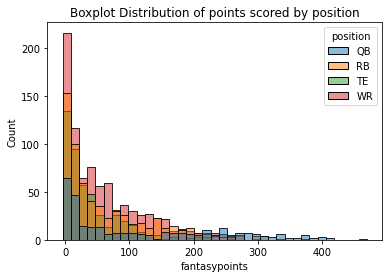

In [80]:
# let's visualize some data within this

ax = sns.histplot(data = ff_collective, x = 'fantasypoints', hue = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

In [82]:
# let's check certain percentiles for fantasypoints distribution

ff_collective['fantasypoints'].quantile([.1, .2, .3, .4, .5, .55, .6])

0.10     2.000
0.20     5.000
0.30    11.600
0.40    20.000
0.50    34.600
0.55    42.000
0.60    51.224
Name: fantasypoints, dtype: float64

So, the bottom 10% of the league scores 2 or less points a season. The median is 34.6. let's see how this looks after filtering out for games played and other nulls 

In [101]:
## Filtering data 

## first, getting rid of those null columns of players without stats for a given year

ff_collective_sm = ff_collective.dropna(subset = ['tm', 'g', 'gs'])

## setting a filter for g 

ff_collective_sm = ff_collective_sm.loc[ff_collective['g'] >= 5]

Text(0.5, 1.0, 'Distribution of games started')

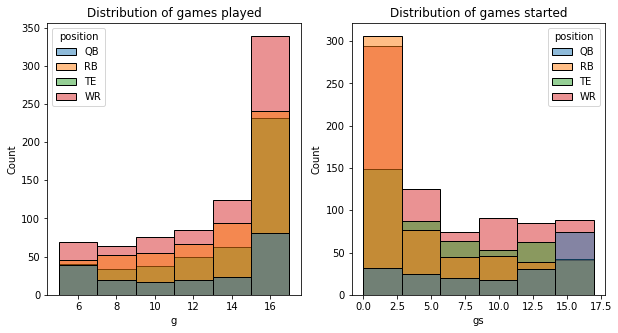

In [60]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

In [102]:
# let's re-check certain percentiles for fantasypoints distribution

ff_collective_sm['fantasypoints'].quantile([.1, .2, .3, .4, .5, .55, .6])

0.10     4.00
0.20    10.00
0.30    18.09
0.40    31.04
0.50    46.00
0.55    55.00
0.60    66.00
Name: fantasypoints, dtype: float64

The median here has increased, as predicted. We'll use this median as the cutoff for fantasy points in a season in this dataset (46 points).

Thus far, we've excluded players that didn't have any fantasy stats ('g', 'gs', 'tm' all null), players with >= 5 games played (20th percentile), and >= median of fantasy points for all players, as we want relevant players.

In [136]:
ff_collective_sm = ff_collective_sm.loc[ff_collective_sm['fantasypoints'] >= (ff_collective_sm['fantasypoints'].quantile(.5))]

Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

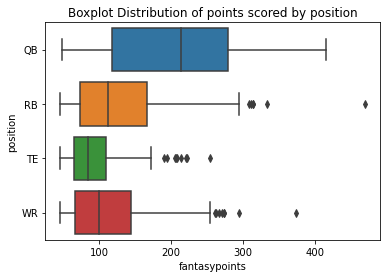

In [86]:
# let's revisualize some data within this

ax = sns.boxplot(data = ff_collective_sm, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

At this point, other cutoffs should be made at a position by position basis. 

### Further cleaning and feature engineering

In [103]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

ff_nulls = ff_collective_sm.isna().sum()

print(ff_nulls)

team                                          4
player_name                                   4
position                                      4
player_id_x                                   4
height                                        4
weight                                        4
years_exp                                     5
tm                                            0
pos                                          50
age                                           0
g                                             0
gs                                            0
tgt                                           0
rec                                           0
passingyds                                    0
passingtd                                     0
passingatt                                    0
rushingyds                                    0
rushingtd                                     0
rushingatt                                    0
receivingyds                            

what columns can we simply get rid of (Redundant info, but one has nulls, or one with nulls that we will derive later on, like avg_rush_yards or yards per target)

rush_yards, rush_attempts, avg_rush_yards, rush_touchdowns, targets, receptions, yards, rec_touchdowns, y/a, y/r, completions, completion_percentage, 2pm, 2pp, posrank, totaltds_22

In [104]:
# cols to drop

cols_drop = ['rush_yards', 'rush_attempts', 'avg_rush_yards', 
             'rush_touchdowns', 'targets', 'receptions', 'yards', 
             'rec_touchdowns', 'y/a', 'y/r', 'completions', 'completion_percentage',
            '2pm', '2pp', 'posrank', 'totaltds_22']

ff_collective_sm.drop(cols_drop, axis = 1, inplace = True)

In [105]:
ff_collective_sm.head()

team    player_name position player_id_x  height  weight  years_exp   tm  \
1  ARI   Kyler Murray       QB  00-0035228    70.0   207.0        0.0  ARI   
4  ARI  David Johnson       RB  00-0032187    73.0   224.0        4.0  ARI   
5  ARI   Kenyan Drake       RB  00-0033118    73.0   211.0        3.0  2TM   
6  ARI    D.J. Foster       RB  00-0032577    72.0   205.0        3.0  ARI   
8  ARI  Chase Edmonds       RB  00-0034681    69.0   210.0        1.0  ARI   

  pos   age     g    gs   tgt   rec  passingyds  passingtd  passingatt  \
1  QB  22.0  16.0  16.0   0.0   0.0      3722.0       20.0       542.0   
4  RB  28.0  13.0   9.0  47.0  36.0         0.0        0.0         0.0   
5  RB  25.0  14.0  10.0  68.0  50.0         0.0        0.0         0.0   
6   0  26.0   6.0   0.0   0.0   0.0         0.0        0.0         0.0   
8  RB  23.0  13.0   2.0  21.0  12.0         0.0        0.0         0.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
1       544.0        4.0        93.0           0.0          0.0   
4       345.0        2.0        94.0         370.0          4.0   
5       817.0        8.0       170.0         345.0          0.0   
6         0.0        0.0         0.0           0.0          0.0   
8       303.0        4.0        60.0         105.0          1.0   

   fantasypoints   int  fumbles  fumbleslost    adp           name  season  \
1         279.28  12.0      5.0          2.0  114.0   Kyler Murray    2019   
4         141.50   0.0      1.0          1.0    5.0  David Johnson    2019   
5         212.20   0.0      2.0          1.0   89.0   Kenyan Drake    2019   
6           0.00   0.0      0.0          0.0    NaN            NaN    2019   
8          82.80   0.0      0.0          0.0    NaN            NaN    2019   

   cmp  ppr  dkpt  fdpt  vbd team_abb  player_id_y  qbr_total  pts_added  \
1  NaN  NaN   NaN   NaN  NaN      ARI    3917315.0       57.7       16.2   
4  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN        NaN   
5  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN        NaN   
6  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN        NaN   
8  NaN  NaN   NaN   NaN  NaN      NaN          NaN        NaN        NaN   

   qb_plays  epa_total  pass   run  exp_sack  qbr_raw  sack  name_display  \
1     709.0       71.6  37.3  13.4       0.0     58.0 -17.8  Kyler Murray   
4       NaN        NaN   NaN   NaN       NaN      NaN   NaN           NaN   
5       NaN        NaN   NaN   NaN       NaN      NaN   NaN           NaN   
6       NaN        NaN   NaN   NaN       NaN      NaN   NaN           NaN   
8       NaN        NaN   NaN   NaN       NaN      NaN   NaN           NaN   

  player_display_name player_gsis_id_x  avg_time_to_throw  \
1        Kyler Murray       00-0035228           2.733681   
4       David Johnson              NaN                NaN   
5        Kenyan Drake              NaN                NaN   
6                 NaN              NaN                NaN   
8       Chase Edmonds              NaN                NaN   

   avg_completed_air_yards  avg_intended_air_yards  \
1                 4.914236                6.850385   
4                      NaN                     NaN   
5                      NaN                     NaN   
6                      NaN                     NaN   
8                      NaN                     NaN   

   avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
1                   -1.936149       13.732432                    38.64734   
4                         NaN             NaN                         NaN   
5                         NaN             NaN                         NaN   
6                         NaN             NaN                         NaN   
8                         NaN             NaN                         NaN   

   avg_air_yards_to_sticks   attempts  pass_yards  pass_touchdowns  \
1                -2.111357  63.764706  437.882353         2.352941   
4

In [113]:
# running calculations on the data frame

# setting up as a list of tuples

calculations = [
    ('pct_gs', 'gs', 'g', lambda x, y: x / y),
    ('avg_per_rush', 'rushingyds', 'rushingatt', lambda x, y: x / y),
    ('avg_per_catch', 'receivingyds', 'rec', lambda x, y: x / y),
    ('avg_per_tgt', 'receivingyds', 'tgt', lambda x, y: x / y),
    ('std_fp', 'passingyds', 'rushingyds', 'receivingyds', 'rushingtd', 'passingtd', 'receivingtd', 'rec', 'int', 'fumbleslost',
     lambda x, y=None, z=None, a=None, b=None, c=None, d=None, e=None, f=None: x * 0.04 + (y+z)*0.1 + (a + c)*6 + (b or 0) * 5 + (d or 0) * 0.5 + (e + f)*2),
    ('ttl_touch', 'rushingatt', 'rec', lambda x, y: x + y),
    ('ttl_opp', 'rushingatt', 'tgt', 'passingatt', lambda x, y, z=None, a=None: x + y + (z or 0) + (a or 0)),
    ('ttl_opp_per_game', 'ttl_opp', 'g', lambda x, y: x / y),
    ('yds_per_opp', 'receivingyds', 'rushingyds', 'passingyds', 'ttl_opp', lambda x, y, z, a: (x + y + z) / a),
    ('td_per_opp', 'receivingtd', 'rushingtd', 'passingtd', 'ttl_opp', lambda x, y, z, a: (x + y + z) / a),
    ('turnover_per_opp', 'int', 'fumbles', 'ttl_opp', lambda x, y, z, a: (x + y) / a),
    ('fp_per_opp', 'fantasypoints', 'ttl_opp', lambda x, y: x / y),
    ('fp_per_gm', 'fantasypoints', 'g', lambda x, y: x / y)
]

for calc in calculations:
    column_name, *columns, operation = calc
    ff_collective_sm[column_name] = operation(*[ff_collective_sm[col] for col in columns])

# Display the updated DataFrame
print(ff_collective_sm)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [137]:
# running similar code as above to create new columns

# percentage of games started
ff_collective_sm['pct_gs'] = ff_collective_sm['gs'] / ff_collective_sm['g'] 

ff_collective_sm['avg_per_rush'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushingatt']

ff_collective_sm['avg_per_catch'] = ff_collective_sm['receivingyds'] / ff_collective_sm['rec']

ff_collective_sm['avg_per_tgt'] = ff_collective_sm['receivingyds'] / ff_collective_sm['tgt']

ff_collective_sm['ttl_touch'] = ff_collective_sm['rushingatt'] + ff_collective_sm['rec']

ff_collective_sm['ttl_opp'] = ff_collective_sm['rushingatt'] + ff_collective_sm['tgt'] + ff_collective_sm['passingatt']

ff_collective_sm['ttl_turnover'] = ff_collective_sm['int'] + ff_collective_sm['fumbleslost']

ff_collective_sm['ttl_opp_per_game'] = ff_collective_sm['ttl_opp'] / ff_collective_sm['g']

ff_collective_sm['yds_per_opp'] = (ff_collective_sm['receivingyds'] + ff_collective_sm['rushingyds'] + ff_collective_sm['passingyds']) / ff_collective_sm['ttl_opp']

ff_collective_sm['td_per_opp'] = (ff_collective_sm['receivingtd'] + ff_collective_sm['rushingtd'] + ff_collective_sm['passingtd']) / ff_collective_sm['ttl_opp']

ff_collective_sm['turnover_per_opp'] = ff_collective_sm['ttl_turnover'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_opp'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_gm'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['g']

# If rookie year
ff_collective_sm['rookie'] = np.where(ff_collective_sm['years_exp'] == 0, 1, 0)

ff_collective_sm['scrimyds'] = ff_collective_sm['rushingyds'] + ff_collective_sm['receivingyds']
ff_collective_sm['non_pass_tds'] = ff_collective_sm['rushingtd']  + ff_collective_sm['receivingtd']

# getting standard fantasy points
ff_collective_sm['std_fp'] = ff_collective_sm['passingyds'] * 0.04 + ff_collective_sm['scrimyds'] * 0.1 + \
                          ff_collective_sm['passingtd'] * 4 + ff_collective_sm['non_pass_tds'] * 6 + \
                          ff_collective_sm['ttl_turnover'] * -2

# creating another with 5 pt passing tds
ff_collective_sm['std_fp_5ptd'] = ff_collective_sm['std_fp'] + ff_collective_sm['passingtd']


ff_collective_sm['hppr_fp'] = ff_collective_sm['std_fp'] + (0.5 * ff_collective_sm['rec'])
ff_collective_sm['hppr_fp_5ptd'] = ff_collective_sm['std_fp_5ptd'] + (0.5 * ff_collective_sm['rec'])

# writing short function for te_premium points
def te_prem(row):
    if row['position'] == 'TE':
        return row['std_fp'] + (1 * row['rec'])
    else:
        return row['std_fp'] + (0.5 * row['rec'])
                                
ff_collective_sm['te_prem_pts'] = ff_collective_sm.apply(lambda row: te_prem(row), axis=1)
ff_collective_sm['te_prem_pts_p5td'] = ff_collective_sm['te_prem_pts']  + ff_collective_sm['passingtd']

ff_collective_sm['hppr_pts_pg_5ptd'] = ff_collective_sm['hppr_fp_5ptd'] / ff_collective_sm['g']

ff_collective_sm['te_prem_pts_pg_5ptd'] = ff_collective_sm['te_prem_pts_p5td'] / ff_collective_sm['g']

ff_collective_sm.sample(5)

C:\Users\steph\AppData\Local\Temp/ipykernel_14988/1235415358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_collective_sm['pct_gs'] = ff_collective_sm['gs'] / ff_collective_sm['g']
C:\Users\steph\AppData\Local\Temp/ipykernel_14988/1235415358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_collective_sm['avg_per_rush'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushingatt']
C:\Users\steph\AppData\Local\Temp/ipykernel_14988/1235415358.py:8: SettingWithCopyWarning: 
A value is trying t

team       player_name position player_id_x  height  weight  years_exp  \
1420   KC      Travis Kelce       TE  00-0030506    77.0   260.0        7.0   
506    LA       Cooper Kupp       WR  00-0033908    74.0   208.0        2.0   
3315  NYJ       Corey Davis       WR  00-0033871    75.0   209.0        5.0   
346    GB  Geronimo Allison       WR  00-0032626    75.0   202.0        3.0   
2933  DEN  Courtland Sutton       WR  00-0034348    76.0   216.0        4.0   

       tm pos   age     g    gs    tgt    rec  passingyds  passingtd  \
1420  KAN  TE  31.0  15.0  15.0  145.0  105.0         4.0        0.0   
506   LAR  WR  26.0  16.0  14.0  134.0   94.0         0.0        0.0   
3315  NYJ  WR  27.0  13.0  10.0   64.0   32.0         0.0        0.0   
346   GNB  WR  25.0  16.0   6.0   55.0   34.0         0.0        0.0   
2933  DEN  WR  27.0  15.0  15.0  109.0   64.0         0.0        0.0   

      passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
1420         2.0         0.0        0.0         0.0        1416.0   
506          1.0         4.0        0.0         2.0        1161.0   
3315         0.0         0.0        0.0         0.0         536.0   
346          0.0         7.0        0.0         1.0         287.0   
2933         0.0         5.0        0.0         1.0         829.0   

      receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
1420         11.0          208.0  0.0      1.0          1.0   21.0   
506          10.0          270.5  0.0      3.0          0.0   47.0   
3315          2.0           66.0  0.0      0.0          0.0    NaN   
346           2.0           73.4  0.0      2.0          1.0  101.0   
2933          2.0           95.0  0.0      0.0          0.0   50.0   

                  name  season  cmp    ppr   dkpt   fdpt  vbd team_abb  \
1420      Travis Kelce    2020  NaN    NaN    NaN    NaN  NaN      NaN   
506        Cooper Kupp    2019  NaN    NaN    NaN    NaN  NaN      NaN   
3315               NaN    2022  0.0   97.6  100.6   81.6  NaN      NaN   
346   Geronimo Allison    2019  NaN    NaN    NaN    NaN  NaN      NaN   
2933  Courtland Sutton    2022  0.0  159.4  162.4  127.4  NaN      NaN   

      player_id_y  qbr_total  pts_added  qb_plays  epa_total  pass  run  \
1420          NaN        NaN        NaN       NaN        NaN   NaN  NaN   
506           NaN        NaN        NaN       NaN        NaN   NaN  NaN   
3315          NaN        NaN        NaN       NaN        NaN   NaN  NaN   
346           NaN        NaN        NaN       NaN        NaN   NaN  NaN   
2933          NaN        NaN        NaN       NaN        NaN   NaN  NaN   

      exp_sack  qbr_raw  sack name_display player_display_name  \
1420       NaN      NaN   NaN          NaN        Travis Kelce   
506        NaN      NaN   NaN          NaN         Cooper Kupp   
3315       NaN      NaN   NaN          NaN         Corey Davis   
346        NaN      NaN   NaN          NaN    Geronimo Allison   
2933       NaN      NaN   NaN          NaN    Courtland Sutton   

     player_gsis_id_x  avg_time_to_throw  avg_completed_air_yards  \
1420              NaN                NaN                      NaN   
506               NaN                NaN                      NaN   
3315              NaN                NaN                      NaN   
346               NaN                NaN                      NaN   
2933              NaN                NaN                      NaN   

      avg_intended_air_yards  avg_air_yards_differential  aggressiveness  \
1420                8.702005                         NaN             NaN   
506                 6.986496                         NaN             NaN   
3315               13.477332                         NaN             NaN   
346                 9.058591                         NaN             NaN   
2933               13.144624                         NaN             NaN   

      max_completed_air_distance  avg_air_yards_to_sticks  attempts  \
1420                     

In [140]:
# fantasypoints are ppr points with standard qb scoring (4 pts per td pass)

ff_collective_sm[['rec', 'passingtd', 'fantasypoints', 'std_fp', 'hppr_fp', 'te_prem_pts']].sample(25)

rec  passingtd  fantasypoints  std_fp  hppr_fp  te_prem_pts
2148   28.0        0.0          66.00   65.60    79.60        79.60
312    62.0        0.0         193.90  131.90   162.90       162.90
1698   28.0        0.0         142.00  138.40   152.40       152.40
1845   42.0        0.0         105.00  105.20   126.20       126.20
1954   38.0        0.0          52.00   51.50    70.50        70.50
2724    0.0        2.0          50.00   48.02    48.02        48.02
332    39.0        0.0         146.30  107.30   126.80       126.80
338    38.0        0.0         100.70   62.70    81.70       100.70
2285   45.0        0.0          92.00   90.20   112.70       112.70
3187  119.0        0.0         228.00  222.20   281.70       281.70
876    23.0        0.0          73.90   50.90    62.40        73.90
756    17.0        0.0          48.70   31.70    40.20        40.20
1384   16.0        0.0          84.00   83.70    91.70        91.70
2690   67.0        0.0          89.00   89.00   122.50       122.50
1405   60.0        0.0         125.00  124.50   154.50       154.50
2881   61.0        0.0         106.00  100.10   130.60       130.60
1833   43.0        0.0         100.00  100.30   121.80       121.80
687    18.0        0.0          71.40   53.40    62.40        62.40
498    37.0        0.0          89.80   52.80    71.30        89.80
357     1.0       26.0         318.98  317.98   318.48       318.48
3272   28.0        0.0          73.00   72.50    86.50        86.50
49     49.0        0.0          98.80   49.80    74.30        74.30
214    74.0        0.0         201.30  127.30   164.30       164.30
1692    0.0       16.0         198.00  188.40   188.40       188.40
1328   36.0        0.0         217.00  216.80   234.80       234.80

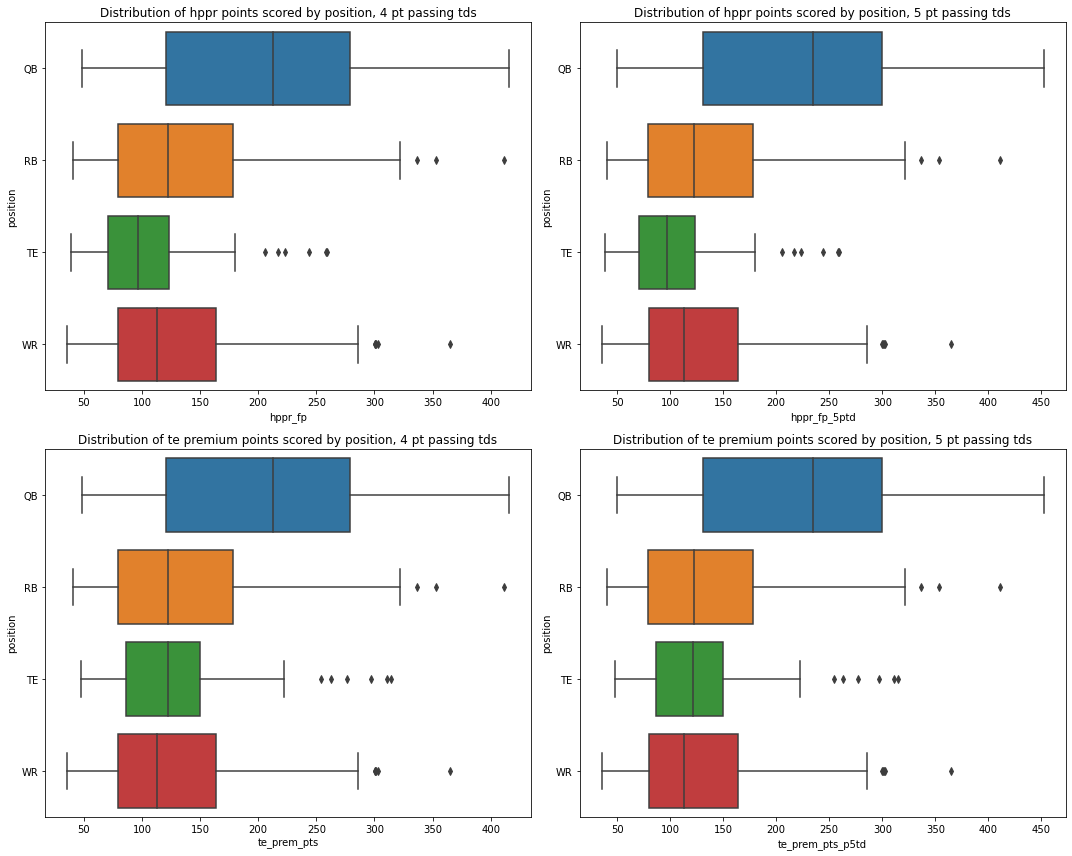

In [149]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Distribution of te premium points per game scored by position, 5 pt passing tds')

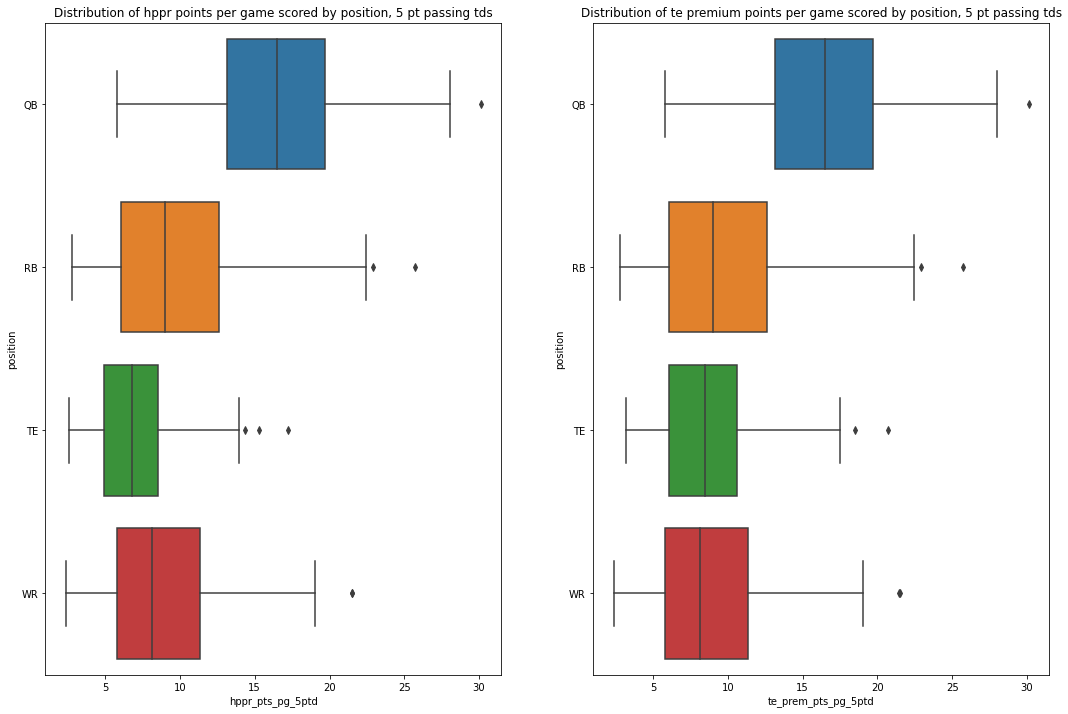

In [147]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_pts_pg_5ptd', ax = axes[0], y = 'position')
axes[0].set_title('Distribution of hppr points per game scored by position, 5 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_pg_5ptd', ax = axes[1], y = 'position')
axes[1].set_title('Distribution of te premium points per game scored by position, 5 pt passing tds')


Text(0.5, 1.0, 'Distribution of games started')

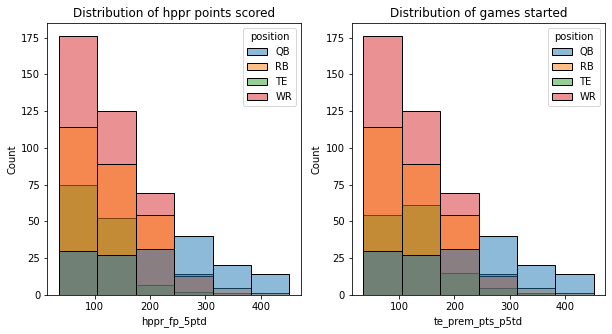

In [152]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of hppr points scored')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

In [153]:
### Seperating by position

# creating separate ff

ff_rb_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'RB']
ff_wr_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'WR']
ff_qb_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'QB']
ff_te_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_t = ff_rb_t.dropna(how = 'all', axis = 1)
ff_qb_t = ff_qb_t.dropna(how = 'all', axis = 1)
ff_wr_t = ff_wr_t.dropna(how = 'all', axis = 1)
ff_te_t = ff_te_t.dropna(how = 'all', axis = 1)

In [155]:
ff_rb_t.head()

team      player_name position player_id_x  height  weight  years_exp   tm  \
4   ARI    David Johnson       RB  00-0032187    73.0   224.0        4.0  ARI   
5   ARI     Kenyan Drake       RB  00-0033118    73.0   211.0        3.0  2TM   
8   ARI    Chase Edmonds       RB  00-0034681    69.0   210.0        1.0  ARI   
34  ATL  Devonta Freeman       RB  00-0031285    68.0   206.0        5.0  ATL   
36  ATL       Brian Hill       RB  00-0033567    73.0   219.0        2.0  ATL   

   pos   age     g    gs   tgt   rec  passingyds  passingtd  passingatt  \
4   RB  28.0  13.0   9.0  47.0  36.0         0.0        0.0         0.0   
5   RB  25.0  14.0  10.0  68.0  50.0         0.0        0.0         0.0   
8   RB  23.0  13.0   2.0  21.0  12.0         0.0        0.0         0.0   
34  RB  27.0  14.0  14.0  70.0  59.0         0.0        0.0         0.0   
36  RB  24.0  12.0   2.0  14.0  10.0         0.0        0.0         0.0   

    rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
4        345.0        2.0        94.0         370.0          4.0   
5        817.0        8.0       170.0         345.0          0.0   
8        303.0        4.0        60.0         105.0          1.0   
34       656.0        2.0       184.0         410.0          4.0   
36       323.0        2.0        78.0          69.0          1.0   

    fantasypoints  int  fumbles  fumbleslost   adp             name  season  \
4           141.5  0.0      1.0          1.0   5.0    David Johnson    2019   
5           212.2  0.0      2.0          1.0  89.0     Kenyan Drake    2019   
8            82.8  0.0      0.0          0.0   NaN              NaN    2019   
34          197.6  0.0      3.0          2.0  29.0  Devonta Freeman    2019   
36           67.2  0.0      0.0          0.0   NaN              NaN    2019   

    cmp  ppr  dkpt  fdpt  vbd player_display_name  efficiency  \
4   NaN  NaN   NaN   NaN  NaN       David Johnson    4.014747   
5   NaN  NaN   NaN   NaN  NaN        Kenyan Drake    4.013463   
8   NaN  NaN   NaN   NaN  NaN       Chase Edmonds    4.603175   
34  NaN  NaN   NaN   NaN  NaN     Devonta Freeman    4.798065   
36  NaN  NaN   NaN   NaN  NaN          Brian Hill    6.094754   

    percent_attempts_gte_eight_defenders  avg_time_to_los  \
4                               7.957232         2.842629   
5                               8.832442         2.889761   
8                               0.000000         3.487407   
34                             22.823735         2.886993   
36                             44.166667         2.991167   

    expected_rush_yards  rush_yards_over_expected  \
4            123.646390                -19.479724   
5            127.815758                  7.638788   
8            105.120986                 20.879014   
34           122.938834                -29.861911   
36            60.772751                -16.272751   

    rush_yards_over_expected_per_att  rush_pct_over_expected player_gsis_id  \
4                          -0.662145                0.280077     00-0032187   
5                           0.087014                0.359617     00-0033118   
8                           0.773297                0.481481     00-0034681   
34                         -1.140637                0.288473     00-0031285   
36                         -0.950655                0.277193     00-0033567   

                 team  pts_scored     1std     totyd     passy     rushy  \
4   Arizona Cardinals     22.5625  19.6250  341.6875  217.3125  124.3750   
5   Arizona Cardinals     22.5625  19.6250  341.6875  217.3125  124.3750   
8   Arizona Cardinals     22.5625  19.6250  341.6875  217.3125  124.3750   
34    Atlanta Falcons     23.8125  23.9375  379.6875  294.6250   85.0625   
36    Atlanta Falcons     23.8125  23.9375  379.6875  294.6250   85.0625   

          to   offense    defense  pts_allowed  yds_allowed  passyds_allowed  \
4   2.000000  4.022500 -10.846875      27.6250     402.0000          281.875   
5   2.000000

In [154]:
# saving these new DFs

ff_collective_sm.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv")

ff_rb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_collective.csv")
ff_wr_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_collective.csv")
ff_qb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_collective.csv")
ff_te_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_collective.csv")

In [104]:
pd.set_option('display.max_columns', None)
ff_all.head()

team_19 player_name_19 position_19 player_id_x  height_19  weight_19  \
0     ARI  Brett Hundley          QB  00-0031589       75.0      226.0   
1     ARI   Kyler Murray          QB  00-0035228       70.0      207.0   
2     ARI  Alfred Morris          RB  00-0029141       70.0      222.0   
3     ARI  David Johnson          RB  00-0032187       73.0      224.0   
4     ARI   Kenyan Drake          RB  00-0033118       73.0      211.0   

   years_exp_19 tm_19 pos_19  age_19  g_19  gs_19  tgt_19  rec_19  \
0           4.0   ARI     QB    26.0   3.0    0.0     0.0     0.0   
1           0.0   ARI     QB    22.0  16.0   16.0     0.0     0.0   
2           7.0   ARI     RB    31.0   1.0    0.0     0.0     0.0   
3           4.0   ARI     RB    28.0  13.0    9.0    47.0    36.0   
4           3.0   2TM     RB    25.0  14.0   10.0    68.0    50.0   

   passingyds_19  passingtd_19  passingatt_19  rushingyds_19  rushingtd_19  \
0           49.0           0.0           11.0           41.0           0.0   
1         3722.0          20.0          542.0          544.0           4.0   
2            0.0           0.0            0.0            4.0           0.0   
3            0.0           0.0            0.0          345.0           2.0   
4            0.0           0.0            0.0          817.0           8.0   

   rushingatt_19  receivingyds_19  receivingtd_19  fantasypoints_19  int_19  \
0            7.0              0.0             0.0              6.06     0.0   
1           93.0              0.0             0.0            279.28    12.0   
2            1.0              0.0             0.0              0.40     0.0   
3           94.0            370.0             4.0            141.50     0.0   
4          170.0            345.0             0.0            212.20     0.0   

   fumbles_19  fumbleslost_19 team_20 player_name_20 position_20  height_20  \
0         0.0             0.0     NaN            NaN         NaN        NaN   
1         5.0             2.0     ARI   Kyler Murray          QB       70.0   
2         0.0             0.0     NYG  Alfred Morris          RB       70.0   
3         1.0             1.0     HOU  David Johnson          RB       73.0   
4         2.0             1.0     ARI   Kenyan Drake          RB       73.0   

   weight_20  years_exp_20 tm_20 pos_20  age_20  g_20  gs_20  tgt_20  rec_20  \
0        NaN           NaN   NaN    NaN     NaN   NaN    NaN     NaN     NaN   
1      207.0           1.0   ARI     QB    23.0  16.0   16.0     0.0     0.0   
2      224.0           8.0   NYG     RB    32.0   9.0    0.0     4.0     3.0   
3      224.0           5.0   HOU     RB    29.0  12.0   12.0    46.0    33.0   
4      211.0           4.0   ARI     RB    26.0  15.0   13.0    31.0    25.0   

   passingyds_20  passingtd_20  passingatt_20  rushingyds_20  rushingtd_20  \
0            NaN           NaN            NaN            NaN           NaN   
1         3971.0          26.0          558.0          819.0          11.0   
2            0.0           0.0            0.0          238.0           1.0   
3            0.0           0.0            0.0          691.0           6.0   
4            0.0           0.0            0.0          955.0          10.0   

   rushingatt_20  receivingyds_20  receivingtd_20  fantasypoints_20  int_20  \
0            NaN              NaN             NaN               NaN     NaN   
1          133.0              0.0             0.0             379.0    12.0   
2           55.0             19.0             1.0              38.0     0.0   
3          147.0            314.0             2.0             147.0     0.0   
4          239.0            137.0             0.0             167.0     0.0   

   fumbles_20  fumbleslost_20 team  player_name_x position  height  weight  \
0         NaN             NaN  NaN            NaN      NaN     NaN     NaN   
1         9.0             4.0  ARI   Kyler Murray       QB    70.0   207.0   
2         0.0             0.0  NaN            NaN      NaN     N

In [29]:
ff_all.shape

(1035, 376)

In [38]:


ff_collective_agg.pivot(index = 'player_name', columns = 'season').reset_index()

player_name height                   weight                       \
season                   2019  2020  2021  2022   2019   2020   2021   2022   
0           A.J. Brown   73.0  72.0  73.0  73.0  226.0  226.0  226.0  226.0   
1           A.J. Green    NaN  76.0  76.0  76.0    NaN  210.0  210.0  210.0   
2          Aaron Jones   69.0  69.0  69.0  69.0  208.0  208.0  208.0  208.0   
3        Aaron Rodgers   74.0  74.0  74.0  74.0  225.0  225.0  225.0  225.0   
4       Adam Humphries   71.0  71.0  71.0   NaN  195.0  195.0  195.0    NaN   
...                ...    ...   ...   ...   ...    ...    ...    ...    ...   
998          Zack Moss    NaN  69.0  69.0  69.0    NaN  215.0  215.0  215.0   
999        Zamir White    NaN   NaN   NaN  71.0    NaN    NaN    NaN  215.0   
1000    Zander Horvath    NaN   NaN   NaN  75.0    NaN    NaN    NaN  230.0   
1001         Zay Jones   74.0  74.0  74.0  74.0  200.0  200.0  200.0  200.0   
1002    Zonovan Knight    NaN   NaN   NaN  71.0    NaN    NaN    NaN  210.0   

       years_exp                     age                      g              \
season      2019  2020  2021  2022  2019  2020  2021 2022  2019  2020  2021   
0            0.0   1.0   2.0   3.0  22.0  23.0  24.0  0.0  16.0  14.0  13.0   
1            NaN   9.0  10.0  11.0   NaN  32.0  33.0  0.0   NaN  16.0  16.0   
2            2.0   3.0   4.0   5.0  25.0  26.0  27.0  0.0  16.0  14.0  15.0   
3           14.0  15.0  16.0  17.0  36.0  37.0  38.0  0.0  16.0  16.0  16.0   
4            4.0   5.0   6.0   NaN  26.0  27.0  28.0  NaN  12.0   7.0  17.0   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
998          NaN   0.0   1.0   2.0   NaN  23.0  24.0  0.0   NaN  13.0  13.0   
999          NaN   NaN   NaN   0.0   NaN   NaN   NaN  0.0   NaN   NaN   NaN   
1000         NaN   NaN   NaN   0.0   NaN   NaN   NaN  0.0   NaN   NaN   NaN   
1001         2.0   3.0   4.0   5.0  24.0  25.0  26.0  0.0  15.0  16.0  17.0   
1002         NaN   NaN   NaN   0.0   NaN   NaN   NaN  0.0   NaN   NaN   NaN   

                gs                    tgt                        rec        \
season  2022  2019  2020  2021 2022  2019   2020   2021   2022  2019  2020   
0       17.0  11.0  12.0  13.0  0.0  84.0  106.0  105.0  146.0  52.0  70.0   
1       15.0   NaN  14.0   9.0  0.0   NaN  104.0   92.0   47.0   NaN  47.0   
2       17.0  16.0  14.0  15.0  0.0  68.0   63.0   65.0   72.0  49.0  47.0   
3       17.0  16.0  16.0  16.0  0.0   0.0    1.0    1.0    0.0   0.0   1.0   
4        NaN   3.0   1.0  11.0  NaN  47.0   35.0   62.0    NaN  37.0  23.0   
...      ...   ...   ...   ...  ...   ...    ...    ...    ...   ...   ...   
998     13.0   NaN   0.0   0.0  0.0   NaN   18.0   32.0   13.0   NaN  14.0   
999     14.0   NaN   NaN   NaN  0.0   NaN    NaN    NaN    0.0   NaN   NaN   
1000    15.0   NaN   NaN   NaN  0.0   NaN    NaN    NaN    8.0   NaN   NaN   
1001    16.0   9.0   2.0   9.0  0.0  45.0   20.0   70.0  121.0  27.0  14.0   
1002     7.0   NaN   NaN   NaN  0.0   NaN    NaN    NaN   14.0   NaN   NaN   

                   passingyds                         passingtd              \
season  2021  2022       2019    2020    2021    2022      2019  2020  2021   
0       63.0  88.0        0.0     0.0     0.0     0.0       0.0   0.0   0.0   
1       54.0  24.0        NaN     0.0     0.0     0.0       NaN   0.0   0.0   
2       52.0  59.0        0.0     0.0     0.0     0.0       0.0   0.0   0.0   
3        1.0   0.0     4002.0  4299.0  4115.0  3695.0      26.0  48.0  37.0   
4       41.0   NaN        0.0     0.0     0.0     NaN       0.0   0.0   0.0   
...      ...   ...        ...     ...     ...     ...       ...   ...   ...   
998     23.0  11.0        NaN     0.0     0.0     0.0       NaN   0.0   0.0   
999      NaN   0.0        NaN     NaN     NaN     0.0       NaN   NaN   NaN   
1000     NaN   5.0        NaN     NaN     NaN     0.0       NaN   NaN   NaN   
1001    47.0  82.0        0.0    29.0     0.0     0.0       0.0   0.0  

In [33]:
ff_all.isna().sum()

team_19                 426
player_name_19          426
position_19             426
player_id_x              22
height_19               426
                       ... 
fp_per_opp22            970
fp_per_gm22             442
rookie22                  0
fantasypoints_22hppr    442
fp_per_gm22hppr         442
Length: 376, dtype: int64

In [32]:
# creating new columns for possibly interesting features

## filling nulls with 0

ff_all[['rushingatt', 'tgt', 'passingatt', 'rushingyds', 'rec', 'fumbles', 'int', 'passingyds']] =  \
ff_all[['rushingatt', 'tgt', 'passingatt', 'rushingyds', 'rec','fumbles', 'int', 'passingyds']].fillna(0)

# percentage of games started

# percentage of games started in 19 and 20.

ff_all['pct_gs19'] = ff_all['gs_19'] / ff_all['g_19']
ff_all['pct_gs20'] = ff_all['gs_20'] / ff_all['g_20']
ff_all['pct_gs21'] = ff_all['gs'] / ff_all['g']
# ff_all['pct_gs22'] = ff_all['gs_22'] / ff_all['g_22']

# rushing yards per attempt each year

ff_all['avg_per_rush19'] = ff_all['rushingyds_19'] / ff_all['rushingatt_19']
ff_all['avg_per_rush20'] = ff_all['rushingyds_20'] / ff_all['rushingatt_20']
ff_all['avg_per_rush21'] = ff_all['rushingyds'] / ff_all['rushingatt']
ff_all['avg_per_rush22'] = ff_all['rushingyds_22'] / ff_all['rushingatt_22']

# rec yards per catch each year

ff_all['avg_per_catch19'] = ff_all['receivingyds_19'] / ff_all['rec_19']
ff_all['avg_per_catch20'] = ff_all['receivingyds_20'] / ff_all['rec_20']
ff_all['avg_per_catch21'] = ff_all['receivingyds'] / ff_all['rec']
ff_all['avg_per_catch22'] = ff_all['receivingyds_22'] / ff_all['rec_22']

# rec yards per target each year

ff_all['avg_per_tgt19'] = ff_all['receivingyds_19'] / ff_all['tgt_19']
ff_all['avg_per_tgt20'] = ff_all['receivingyds_20'] / ff_all['tgt_20']
ff_all['avg_per_tgt21'] = ff_all['receivingyds'] / ff_all['tgt']
ff_all['avg_per_tgt22'] = ff_all['receivingyds_22'] / ff_all['tgt_22']

# total touches 

ff_all['ttl_touch19'] = ff_all['rushingatt_19'] + ff_all['rec_19']
ff_all['ttl_touch20'] = ff_all['rushingatt_20'] + ff_all['rec_20']
ff_all['ttl_touch21'] = ff_all['rushingatt'] + ff_all['rec']
ff_all['ttl_touch22'] = ff_all['rushingatt_22'] + ff_all['rec_22']

# total opportunities
# defining opportunity as a target, rushing attempt and passing attempt

ff_all['ttl_opp19'] = ff_all['rushingatt_19'] + ff_all['tgt_19'] + ff_all['passingatt_19']
ff_all['ttl_opp20'] = ff_all['rushingatt_20'] + ff_all['tgt_20'] + ff_all['passingatt_20']
ff_all['ttl_opp21'] = ff_all['rushingatt'] + ff_all['tgt'] + ff_all['passingatt']
ff_all['ttl_opp22'] = ff_all['rushingatt_22'] + ff_all['tgt_22'] + ff_all['attempts_22']


# total opportunities per game

ff_all['ttl_opp_per_game19'] = ff_all['ttl_opp19'] / ff_all['g_19']
ff_all['ttl_opp_per_game20'] = ff_all['ttl_opp20'] / ff_all['g_20']
ff_all['ttl_opp_per_game21'] = ff_all['ttl_opp21'] / ff_all['g']
ff_all['ttl_opp_per_game22'] = ff_all['ttl_opp22'] / ff_all['gp']

# Yards per opportunity
ff_all['yds_per_opp19'] = (ff_all['receivingyds_19'] + ff_all['rushingyds_19'] + ff_all['passingyds_19']) / ff_all['ttl_opp19']
ff_all['yds_per_opp20'] = (ff_all['receivingyds_20'] + ff_all['rushingyds_20'] + ff_all['passingyds_20']) / ff_all['ttl_opp20']
ff_all['yds_per_opp21'] = (ff_all['receivingyds'] + ff_all['rushingyds'] + ff_all['passingyds']) / ff_all['ttl_opp21']
ff_all['yds_per_opp22'] = (ff_all['receivingyds_22'] + ff_all['rushingyds_22'] + ff_all['passingyds_22']) / ff_all['ttl_opp22']

# Touchdowns per opportunity
ff_all['td_per_opp19'] = (ff_all['receivingtd_19'] + ff_all['rushingtd_19'] + ff_all['passingtd_19']) / ff_all['ttl_opp19']
ff_all['td_per_opp20'] = (ff_all['receivingtd_20'] + ff_all['rushingtd_20'] + ff_all['passingtd_20']) / ff_all['ttl_opp20']
ff_all['td_per_opp21'] = (ff_all['receivingtd'] + ff_all['rushingtd'] + ff_all['passingtd']) / ff_all['ttl_opp21']
ff_all['td_per_opp22'] = (ff_all['receivingtd_22'] + ff_all['rushingtd_22'] + ff_all['passingtd_22']) / ff_all['ttl_opp22']

# Turnovers per opportunity
ff_all['turnover_per_opp19'] = (ff_all['int_19'] + ff_all['fumbles_19']) / ff_all['ttl_opp19']
ff_all['turnover_per_opp20'] = (ff_all['int_20'] + ff_all['fumbles_20']) / ff_all['ttl_opp20']
ff_all['turnover_per_opp21'] = (ff_all['int'] + ff_all['fumbles']) / ff_all['ttl_opp21']
ff_all['turnover_per_opp22'] = (ff_all['int_22'] + ff_all['fumbles_22']) / ff_all['ttl_opp22']

# Fantasy points per opportunity
ff_all['fp_per_opp19'] = ff_all['fantasypoints_19'] / ff_all['ttl_opp19']
ff_all['fp_per_opp20'] = ff_all['fantasypoints_20'] / ff_all['ttl_opp20']
ff_all['fp_per_opp21'] = ff_all['fantasypoints'] / ff_all['ttl_opp21']
ff_all['fp_per_opp22'] = ff_all['fantasypoints_22'] / ff_all['ttl_opp22']

# Fantasy points per game
ff_all['fp_per_gm19'] = ff_all['fantasypoints_19'] / ff_all['g_19']
ff_all['fp_per_gm20'] = ff_all['fantasypoints_20'] / ff_all['g_20']
ff_all['fp_per_gm21'] = ff_all['fantasypoints'] / ff_all['g']
ff_all['fp_per_gm22'] = ff_all['pts/g']

# If rookie year
ff_all['rookie19'] = np.where(ff_all['years_exp_19'] == 0, 1, 0)
ff_all['rookie20'] = np.where(ff_all['years_exp_20'] == 0, 1, 0)
ff_all['rookie21'] = np.where(ff_all['years_exp'] == 0, 1, 0)
ff_all['rookie22'] = np.where(ff_all['years_exp_22'] == 0, 1, 0)

# Half-ppr scoring
ff_all['fantasypoints_19hppr'] = ff_all['fantasypoints_19'] + (0.5 * ff_all['rec_19'])
ff_all['fantasypoints_20hppr'] = ff_all['fantasypoints_20'] + (0.5 * ff_all['rec_20'])
ff_all['fantasypoints_21hppr'] = ff_all['fantasypoints'] + (0.5 * ff_all['rec'])
ff_all['fantasypoints_22hppr'] = ff_all['fantasypoints_22'] + (0.5 * ff_all['rec'])

# Fantasy points per game, hppr
ff_all['fp_per_gm19hppr'] = ff_all['fantasypoints_19hppr'] / ff_all['g_19']
ff_all['fp_per_gm20hppr'] = ff_all['fantasypoints_20hppr'] / ff_all['g_20']
ff_all['fp_per_gm21hppr'] = ff_all['fantasypoints_21hppr'] / ff_all['g']
ff_all['fp_per_gm22hppr'] = ff_all['fantasypoints_22hppr'] / ff_all['gp']

In [110]:
ff_collective.sample(15)

team       player_name position player_id_x  height  weight  years_exp  \
1996  CLE   Harrison Bryant       TE  00-0036232    77.0   240.0        2.0   
2354  SEA      Dareke Young       WR  00-0037093    74.0   210.0        0.0   
986    NE      Dalton Keene       TE  00-0036225    76.0   251.0        0.0   
1395  DEN  Courtland Sutton       WR  00-0034348    76.0   216.0        3.0   
1809  WAS   Garrett Gilbert       QB  00-0031395    76.0   230.0        7.0   
2037  DEN     Freddie Swain       WR  00-0036247    72.0   199.0        2.0   
2081  HOU      Rex Burkhead       RB  00-0030288    70.0   215.0        9.0   
2077   GB      Samori Toure       WR  00-0037098    73.0   190.0        0.0   
2293  NYJ        Ty Johnson       RB  00-0035537    70.0   210.0        3.0   
970   MIN    Brandon Dillon       TE  00-0035102    77.0   250.0        1.0   
2145   KC    Cornell Powell       WR  00-0036647    72.0   210.0        1.0   
2412  WAS     Curtis Samuel       WR  00-0033282    71.0   195.0        5.0   
1234  BAL   Devonta Freeman       RB  00-0031285    68.0   206.0        7.0   
1578  MIA      Myles Gaskin       RB  00-0035311    70.0   200.0        2.0   
2103  IND         Zack Moss       RB  00-0036251    69.0   215.0        2.0   

                player   tm pos   age     g    gs   tgt   rec  passingyds  \
1996   Harrison Bryant  CLE  TE   NaN  17.0   NaN  42.0  31.0         0.0   
2354      Dareke Young  SEA  WR   NaN  13.0   NaN   2.0   2.0         0.0   
986       Dalton Keene  NWE  TE  21.0   6.0   0.0   5.0   3.0         0.0   
1395  Courtland Sutton  DEN  WR  26.0  17.0  16.0  98.0  58.0        16.0   
1809   Garrett Gilbert  WAS  QB  30.0   1.0   1.0   0.0   0.0       194.0   
2037     Freddie Swain  MIA  WR   NaN   4.0   NaN   6.0   4.0         0.0   
2081      Rex Burkhead  HOU  RB   NaN  16.0   NaN  51.0  37.0         0.0   
2077      Samori Toure   GB  WR   NaN  11.0   NaN  10.0   5.0         0.0   
2293        Ty Johnson  NYJ  RB   NaN  17.0   NaN  24.0  12.0         0.0   
970     Brandon Dillon  MIN  TE  23.0   3.0   0.0   1.0   1.0         0.0   
2145    Cornell Powell   KC  WR   NaN   3.0   NaN   0.0   0.0         0.0   
2412     Curtis Samuel  WAS  WR   NaN  17.0   NaN  92.0  64.0         0.0   
1234   Devonta Freeman  BAL  RB  29.0  16.0   8.0  42.0  34.0         0.0   
1578      Myles Gaskin  MIA  RB  24.0  17.0  10.0  63.0  49.0         0.0   
2103         Zack Moss  BUF  RB   NaN  13.0   NaN  13.0  11.0         0.0   

      passingtd  passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
1996        0.0         0.0         8.0        0.0         1.0         239.0   
2354        0.0         0.0         0.0        0.0         0.0          24.0   
986         0.0         0.0         0.0        0.0         0.0          16.0   
1395        0.0         1.0         0.0        0.0         0.0         776.0   
1809        0.0        31.0         0.0        0.0         0.0           0.0   
2037        0.0         0.0         0.0        0.0         0.0          74.0   
2081        0.0         0.0        80.0        1.0        26.0         204.0   
2077        0.0         0.0         0.0        0.0         0.0          82.0   
2293        0.0         0.0       160.0        1.0        30.0          88.0   
970         0.0         0.0         0.0        0.0         0.0           6.0   
2145        0.0         0.0         0.0        0.0         0.0           0.0   
2412        0.0         0.0       187.0        1.0        38.0         656.0   
1234        0.0         0.0       576.0        5.0       133.0         190.0   
1578        0.0         0.0       612.0        3.0       173.0         234.0   
2103        0.0         0.0       456.0        1.0        93.0          39.0   

      receivingtd  fantasypoints  int  fumbles  fumbleslost  season  \
1996          1.0           46.2  0.0      0.0          NaN    2022   
2354          0.0            3.4  0.0      0.0          NaN    2022   
986          

### Splitting all by position



In [111]:
# creating separate ff

ff_rb = ff_all.loc[(ff_all['pos'] == 'RB') | (ff_all['pos_20'] == 'RB') | 
                   (ff_all['pos_19'] == 'RB') | (ff_all['pos_22'] == 'RB')]
ff_wr = ff_all.loc[(ff_all['pos'] == 'WR') | (ff_all['pos_20'] == 'WR') | 
                   (ff_all['pos_19'] == 'WR') | (ff_all['pos_22'] == 'WR')]
ff_qb = ff_all.loc[(ff_all['pos'] == 'QB') | (ff_all['pos_20'] == 'QB') | 
                   (ff_all['pos_19'] == 'QB') | (ff_all['pos_22'] == 'QB')]
ff_te = ff_all.loc[(ff_all['pos'] == 'TE') | (ff_all['pos_20'] == 'TE') | 
                   (ff_all['pos_19'] == 'TE') | (ff_all['pos_22'] == 'TE')]

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb = ff_rb.dropna(how = 'all', axis = 1)
ff_qb = ff_qb.dropna(how = 'all', axis = 1)
ff_wr = ff_wr.dropna(how = 'all', axis = 1)
ff_te = ff_te.dropna(how = 'all', axis = 1)

Data is now separated by position; with stats from 2019, 2020, and 2021 all under each name.

Another thought -- should there be a minimum games played to be on?

Let's make each position simpler, with the more relevant stats kept for each position.
For all:

- key_0, Age_21, Pos_21, Tm_19, Tm_20, Tm_21, pct_GS_19 (Create new variable), pct_GS_20 (create new variable)

RB:

- all but PassingYds_19, PassingTD_19, etc. Player_19, Player_20, Player_21

WR:

- same as RB

QB:

- all but receiving 

TE:

- all but rushing and passing

In [112]:
# saving these to easily get them in other docs
ff_all.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv")
ff_collective.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv")

ff_rb.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_all.csv")
ff_wr.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_all.csv")
ff_qb.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_all.csv")
ff_te.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_all.csv")

In [91]:
ff_collective.iloc[2273:2275, :]

team   player_name position player_id_x  height  weight  years_exp  \
2273  NYG  Daniel Jones       QB  00-0035710    77.0   220.0        3.0   
2274  NYG   Matt Breida       RB  00-0033308    70.0   190.0        5.0   

            player   tm pos  ...  ttl_touch  ttl_opp  ttl_opp_per_game  \
2273  Daniel Jones  NYG  QB  ...      120.0    120.0          7.500000   
2274   Matt Breida  NYG  RB  ...       74.0     79.0          4.647059   

      yds_per_opp  td_per_opp  turnover_per_opp  fp_per_opp  fp_per_gm  \
2273    32.608333    0.183333          0.066667    2.408333  18.062500   
2274     4.278481    0.012658          0.000000    0.630380   2.929412   

      fantasypoints_hppr  fp_per_game_hppr  
2273               289.0         18.062500  
2274                59.8          3.517647  

[2 rows x 111 columns]